In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib notebook

In [2]:
orig_df = pd.read_excel('SmartPartyWare.xlsx')

In [3]:
orig_df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,Sports Party,Pool Party,Barbeque Party,...,Random,Prob(Success==0),Prob(Success==1),Most Likely Success,selectBuy,IndoorParty,factor1,Prob(Success==0) 2,Prob(Success==1) 2,Most Likely Success 2
0,1119,27240,1,260,16,2,18,0,0,1,...,0.001670,0.955683,0.044317,0,0,0,32.500000,0.998731,0.001269,0
1,1475,36588,0,259,12,5,30,1,0,1,...,0.002305,0.714476,0.285524,0,0,2,107.916667,0.998731,0.001269,0
2,345,8322,1,218,16,6,42,1,1,3,...,0.004329,0.955683,0.044317,0,0,0,81.750000,0.998731,0.001269,0
3,228,5367,1,143,14,1,14,0,0,0,...,0.004448,0.926703,0.073297,0,0,0,10.214286,0.998731,0.001269,0
4,390,9509,1,419,8,11,52,4,0,1,...,0.004649,0.714476,0.285524,0,1,5,576.125000,0.118159,0.881841,1


In [4]:
orig_df.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Sports Party',
       'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night', 'Success', 'Random', 'Prob(Success==0)',
       'Prob(Success==1)', 'Most Likely Success', 'selectBuy', 'IndoorParty',
       'factor1', 'Prob(Success==0) 2', 'Prob(Success==1) 2',
       'Most Likely Success 2'],
      dtype='object')

In [5]:
df = orig_df[['ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Sports Party',
       'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night', 'Success']]
df.head()

,ID#,Gender,M,R,F,FirstPurch,Sports Party,Pool Party,Barbeque Party,Birthday Party,End-of-School-Term Party,Art Party,Block Party,Cooking Party,Get Together,Movie Night,Success
0,27240,1,260,16,2,18,0,0,1,0,1,0,0,0,0,0,0
1,36588,0,259,12,5,30,1,0,1,0,0,1,1,0,0,0,0
2,8322,1,218,16,6,42,1,1,3,1,0,0,0,0,0,0,0
3,5367,1,143,14,1,14,0,0,0,1,0,0,0,0,0,0,0
4,9509,1,419,8,11,52,4,0,1,0,1,1,2,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
ID#                         2000 non-null int64
Gender                      2000 non-null int64
M                           2000 non-null int64
R                           2000 non-null int64
F                           2000 non-null int64
FirstPurch                  2000 non-null int64
Sports Party                2000 non-null int64
Pool Party                  2000 non-null int64
Barbeque Party              2000 non-null int64
Birthday Party              2000 non-null int64
End-of-School-Term Party    2000 non-null int64
Art Party                   2000 non-null int64
Block Party                 2000 non-null int64
Cooking Party               2000 non-null int64
Get Together                2000 non-null int64
Movie Night                 2000 non-null int64
Success                     2000 non-null int64
dtypes: int64(17)
memory usage: 265.7 KB


In [7]:
df.describe()

,ID#,Gender,M,R,F,FirstPurch,Sports Party,Pool Party,Barbeque Party,Birthday Party,End-of-School-Term Party,Art Party,Block Party,Cooking Party,Get Together,Movie Night,Success
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,24753.232500,0.708500,206.789000,13.519000,4.005500,27.417500,0.711000,0.314000,0.738500,0.391000,0.270500,0.314500,0.411500,0.128500,0.039500,0.052000,0.108500
std,14425.497508,0.454567,101.336933,8.239696,3.547219,18.740672,1.038758,0.614486,1.079213,0.723451,0.574887,0.631498,0.774253,0.376907,0.207271,0.237327,0.311089
min,2.000000,0.000000,15.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12699.250000,0.000000,126.750000,8.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24201.000000,1.000000,207.000000,12.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37299.500000,1.000000,281.250000,16.000000,6.000000,38.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,49962.000000,1.000000,477.000000,36.000000,12.000000,99.000000,6.000000,5.000000,8.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,1.000000


An interesting observation is that there are customers who have purchased bbq and sports themes 8 and 6 times respectively. they might be a sports enthusiasts or party lovers. Worth looking into.

# Divide data into train and test sets
We are only looking at train set during model development

In [8]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
df_train = X_train.join(y_train )
df_test = X_test.join(y_test)
df_train.head()
df_test.head()

,Gender,M,R,F,FirstPurch,Sports Party,Pool Party,Barbeque Party,Birthday Party,End-of-School-Term Party,Art Party,Block Party,Cooking Party,Get Together,Movie Night,Success
267,1,329,14,5,24,2,1,0,1,0,0,1,0,0,0,0
1672,1,213,14,2,18,0,0,0,1,0,0,0,0,0,0,0
1976,1,96,2,2,6,0,0,0,0,0,0,0,0,0,0,0
1143,1,154,10,9,54,1,0,4,1,1,0,1,1,1,0,0
1632,1,23,6,1,6,0,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train.describe()

count    1600.000000
mean        0.103750
std         0.305031
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Success, dtype: float64

In [10]:
y_test.describe()

count    400.00000
mean       0.12750
std        0.33395
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: Success, dtype: float64

In [11]:
select = ['Sports Party', 'Pool Party', 'Barbeque Party', 'Birthday Party', 'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party', 'Get Together', 'Movie Night']
mask = [False]*len(X_train)
for col in select:
    mask = mask | (X_train[col] > 4)
len(X_train[mask])

23

Only 22 customers have purchased a theme over 4 times. Not many 

## Gender

In [12]:
df_train[['Gender', 'Success']].groupby('Gender').mean()

,Success
Gender,
0,0.142544
1,0.088287


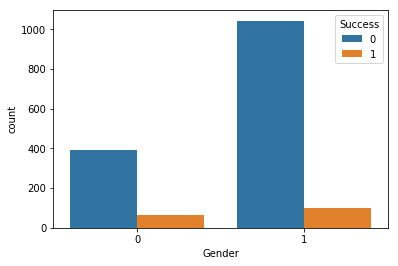

In [13]:
sns.countplot(x="Gender", data=df_train, hue='Success');

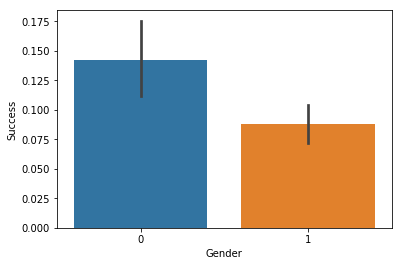

In [14]:
plt.figure()
sns.barplot(x="Gender", y="Success", data=df_train);

Observation: Women are more likely to purchase than men. Hence 'Gender' is a good predictor.

# Monetary

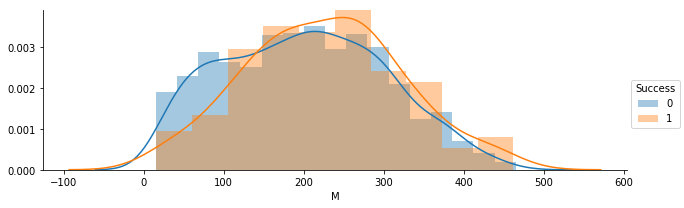

In [15]:
p = sns.FacetGrid(df_train, hue='Success', aspect=3)
p.map(sns.distplot, 'M')
p.add_legend()

There are more non-buyers among people who purchased less product in general (less than 120)

# Recency

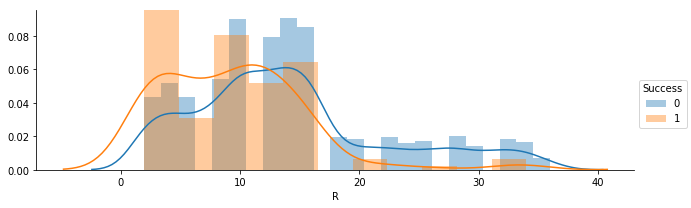

In [16]:
p = sns.FacetGrid(df_train, hue='Success', aspect=3)
p.map(sns.distplot, 'R')
p.add_legend()

Significantly less buyers among those whose last purchase has been more than 15 months ago

# Frequency

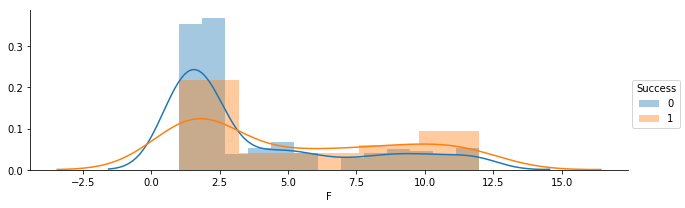

In [17]:
p = sns.FacetGrid(df_train, hue='Success', aspect=3)
p.map(sns.distplot, 'F')
p.add_legend()

Less buyers among those who purchased less than 3 times

# First Purchase

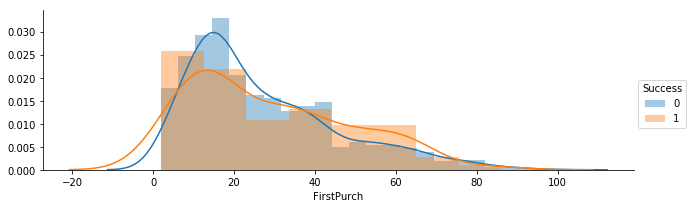

In [18]:
p = sns.FacetGrid(df_train, hue='Success', aspect=3)
p.map(sns.distplot, 'FirstPurch')
p.add_legend()

Might not be a good predictor. 

# Purchase Record of each theme

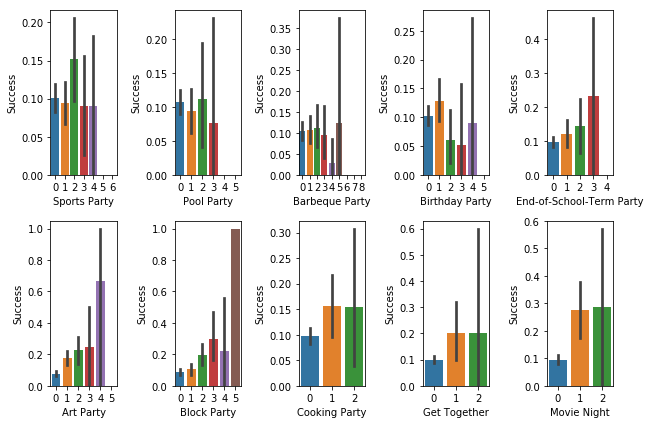

In [19]:
plt.figure(figsize=(9,6))
for i, col in enumerate(select):
    a = plt.subplot(2, 5, i+1)
    sns.barplot(x=col, y='Success', data=df_train, ax=a);
plt.tight_layout()

In [20]:
X_train['Total Purchase'] = X_train[select].apply(sum, axis=1)
df_train['Total Purchase'] = X_train[select].apply(sum, axis=1)
X_test['Total Purchase'] = X_test[select].apply(sum, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


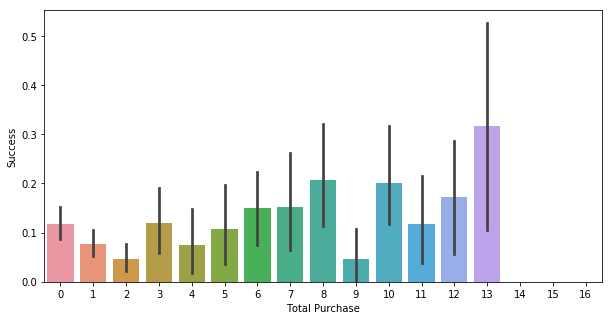

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Purchase', y='Success', data=df_train);

In general customers with more number of purchase are more likely to buy again which makes sense. Note that this is a bit different from monetary factor if prices change over different products. 

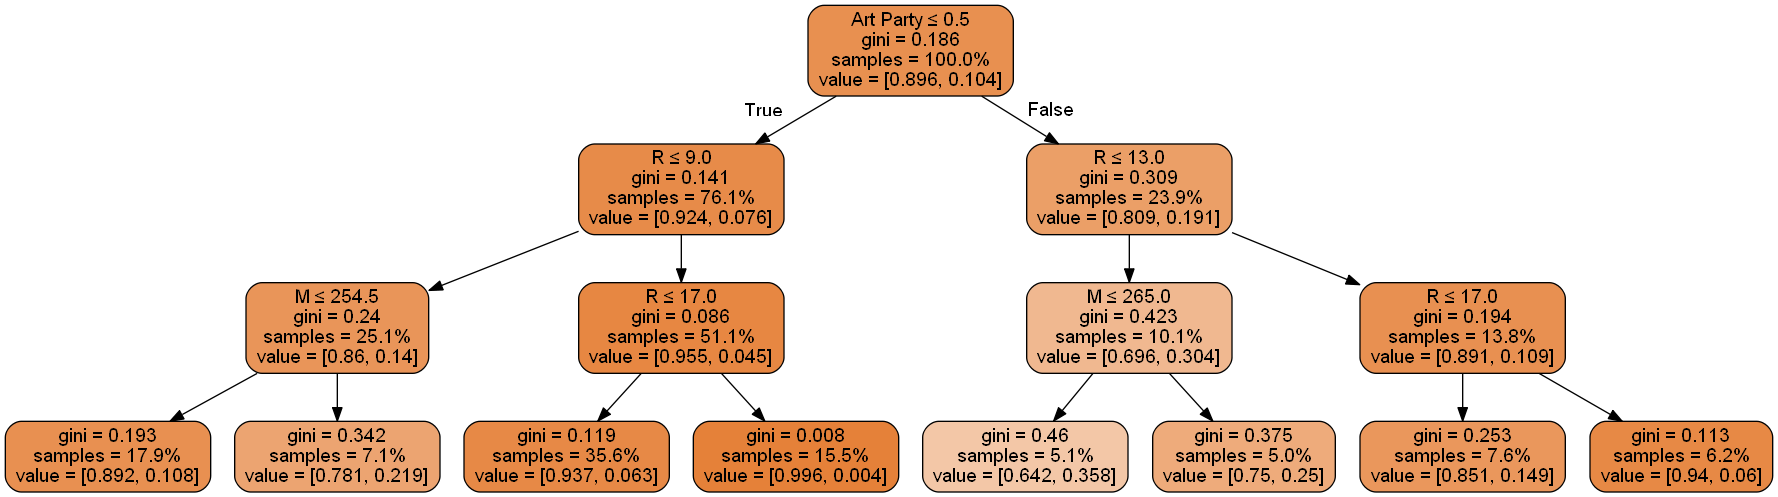

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus




DT = DecisionTreeClassifier(max_depth=3, min_samples_leaf=80, random_state=1)
DT.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=list(X_train.columns), proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




In [23]:
DT.feature_importances_

array([0.        , 0.12023164, 0.56875368, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31101468, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [24]:
X_train.columns

Index(['Gender', 'M', 'R', 'F', 'FirstPurch', 'Sports Party', 'Pool Party',
       'Barbeque Party', 'Birthday Party', 'End-of-School-Term Party',
       'Art Party', 'Block Party', 'Cooking Party', 'Get Together',
       'Movie Night', 'Total Purchase'],
      dtype='object')

In [25]:
df_train['Prob'] = DT.predict_proba(X_train)[:,1]

In [26]:
df_train['Prob'].describe()

count    1600.000000
mean        0.103750
std         0.087743
min         0.004032
25%         0.063269
50%         0.063269
75%         0.108014
max         0.358025
Name: Prob, dtype: float64

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
def profit_calculator(conf_mat, ):
    true_buyers = conf_mat[1,1]
    false_buyers = conf_mat[0,1]
    return 1e5*(45.5*true_buyers - 4*false_buyers)/np.sum(conf_mat)
    
profit = []
for thresh in np.arange(0,df_train['Prob'].max(),.01):
    y_pred = df_train['Prob'].apply(lambda e: 1 if e>thresh else 0)
    profit.append((thresh,profit_calculator(confusion_matrix(df_train['Success'], y_pred))))
    
max(profit,key=lambda e: e[1])


(0.07, 209781.25)

threshold value 0.08 maximizes profit in training set so we use it for test set to find the profit

In [29]:
df_test['Prob'] = DT.predict_proba(X_test)[:,1]
thresh = 0.08
y_pred = df_test['Prob'].apply(lambda e: 1 if e>thresh else 0)
profit_calculator(confusion_matrix(df_test['Success'], y_pred))

317625.0

Profit on test set is less than profit on the training set. The model is probably overfitting to the training data. 

In [30]:
m = confusion_matrix(df_test['Success'], y_pred)

In [31]:
m[1,1]/np.sum(m)

0.0975

In [32]:
true_buyers = len(df_test[df_test.Success == 1])
false_buyers = len(df_test) - true_buyers
1e5*(45.5*true_buyers - 4*false_buyers)/len(df_test)

231125.0

In [33]:
true_buyers = len(df_test)
false_buyers = 0
1e5*(45.5*true_buyers - 4*false_buyers)/len(df_test)

4550000.0